В этом блоке проанализируем А/Б тест

Мы добавили на лендинг с оформлением дебетовой карты (https://www.tinkoff.ru/cards/debit-cards/tinkoff-black/) информацию о дополнительных кэшбеках, которые появляются благодаря нашим патнерам. Рассчитываем, что это вырастит конверсию из переходов на лендинг в оформление дебетовой карты. 

В приложенном файле вам доступны логи переходов на сайт и последующего оформления карточки за каждый день. 

In [1]:
# загрузим необходимые пакеты

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


In [3]:
# Загрузите таблицу в датафрейм

df = pd.read_csv('hw_ab.csv')

In [4]:
# Посмотрите на поля и проанализируйте таблицу: она содержит поля 
# date — дата захода пользователя на лендинг
# id — идентификатор, присвоенный пользователю
# group — группа теста или контроля
# converted – 1, если пользователь оформил карточку и 0, если не оформил

df

,date,id,group,converted
0,2023-08-01,5030836,control,0
1,2023-08-01,5091425,control,0
2,2023-08-01,5106537,control,0
3,2023-08-01,4556522,control,0
4,2023-08-01,4002917,control,0
...,...,...,...,...
94773,2023-11-01,7729860,test,0
94774,2023-11-01,8088716,test,0
94775,2023-11-01,4478281,test,0
94776,2023-11-01,5710762,test,0


In [10]:
# убедитесь,что пользователи уникальные
df.id.nunique()

94778

In [14]:
# убедитесь, что пользователей в тесте и контрле приблизительно равное количество, 
# в каждой группе каждый день теста были пользователи, и они как оформляли карту, так и нет

df['group'].value_counts()

group
test       47448
control    47330
Name: count, dtype: int64

In [17]:
# отличаются ли конверсии в тесте и в контроле?

conv_test = df.loc[df['group'] == 'test', 'converted'].sum() / df.loc[df['group'] == 'test', 'converted'].shape[0]
conv_control = df.loc[df['group'] == 'control', 'converted'].sum() / df.loc[df['group'] == 'control', 'converted'].shape[0]

In [ ]:
# конверсия в контроле: 
print(conv_control)

In [ ]:
# конверсия в тесте: 
print(conv_test)

In [18]:
# отношение конверсий: 

# conv_test = # посчитайте число открытых карт в тесте
# seen_test = # посчитайте общее число наблюдений в тесте, это число заходов на лендинг

# conv_control = # посчитайте число открытых карт в контроле
# seen_control = # посчитайте общее число наблюдений в контроле, это число заходов на лендинг

print((conv_test)/(conv_control)-1)

0.14991652616768292


In [ ]:
# значимо ли это отличие? 
# проверьте статистическим тестом

In [24]:
# сначала используем знание о том, что конверсии распределены биномиально:
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import binom_test

# используйте документацию, чтобы с помощью conv_test,seen_test,conv_control,seen_control получить результат теста
binom_test(x=df.loc[df['group'] == 'test', 'converted'].sum(
), n=df.loc[df['group'] == 'test', 'converted'].shape[0], p=0.1)

/var/folders/nm/y8x88jvj7gn92z749qbk85fh0000gn/T/ipykernel_12200/209062720.py:8: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=df.loc[df['group'] == 'test', 'converted'].sum(


1.3890440395721523e-43

In [25]:
# достаточно ли длинным был тест, чтобы мы могли посчитать средние конверсии и сравнить значимость их различия? 
# посчитайте количество дней теста, убедитесь, что среди них нет пропусков

df['date'].nunique()

93

In [27]:
df.groupby('date', as_index=False).agg({'converted': 'sum'})

,date,converted
0,2023-08-01,108
1,2023-08-02,121
2,2023-08-03,129
3,2023-08-04,110
4,2023-08-05,101
...,...,...
88,2023-10-28,113
89,2023-10-29,113
90,2023-10-30,118
91,2023-10-31,122


In [28]:
# посчитайте количество открытых карт и средние конверсии по дням в тесте и в контроле:

test_n_by_date = df.loc[df['group'] == 'test'].groupby('date', as_index=False).agg({'converted': 'sum'})
# посчитайте количество открытых карт и средние конверсии по дням в тесте
control_n_by_date = df.loc[df['group'] == 'control'].groupby('date', as_index=False).agg({'converted': 'sum'})
# посчитайте количество открытых карт и средние конверсии по дням в контроле


In [39]:
# посчитайте конверсию из посещений в оформленние карт по дням

test_by_date = df.loc[df['group'] == 'test'].groupby('date', as_index=False)['group'].value_counts()
test_conv_by_date = test_n_by_date['converted'] / test_by_date['count']
# посчитайте конверсию из посещений в оформленние карт по дням в тесте
control_by_date = df.loc[df['group'] == 'control'].groupby('date', as_index=False)['group'].value_counts()
control_conv_by_date =  control_n_by_date['converted'] / control_by_date['count']
# посчитайте конверсию из посещений в оформленние карт по дням в контроле


In [37]:
df.loc[df['group'] == 'test'].groupby('date', as_index=False)['group'].value_counts()

,date,group,count
0,2023-08-01,test,513
1,2023-08-02,test,508
2,2023-08-03,test,539
3,2023-08-04,test,499
4,2023-08-05,test,506
...,...,...,...
88,2023-10-28,test,530
89,2023-10-29,test,538
90,2023-10-30,test,480
91,2023-10-31,test,508


(0.0, 100.0)

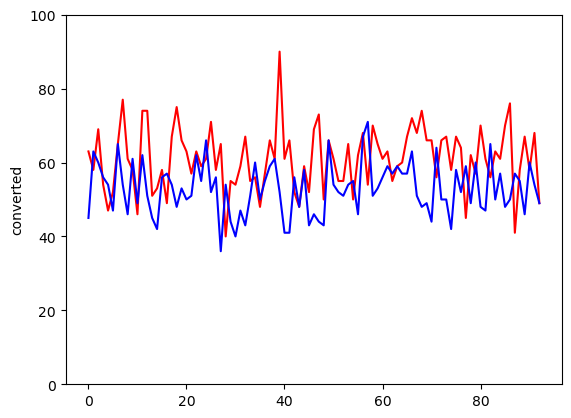

In [41]:
# построим график, отражающий количество оформленных карт по дням

sns.lineplot(data= test_n_by_date['converted'], color = "red")
sns.lineplot(data= control_n_by_date['converted'], color ="blue")

plt.ylim(0, 100)

(0.0, 0.2)

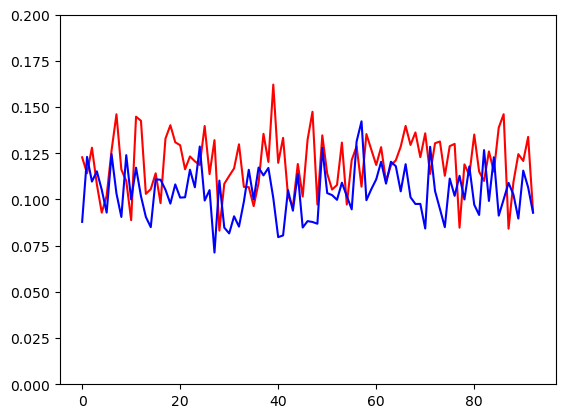

In [42]:
# построим график, отражающий конверсию из посещений в оформленние карт по дням

sns.lineplot(data= test_conv_by_date, color = "red")
sns.lineplot(data= control_conv_by_date, color ="blue")

plt.ylim(0, 0.2)

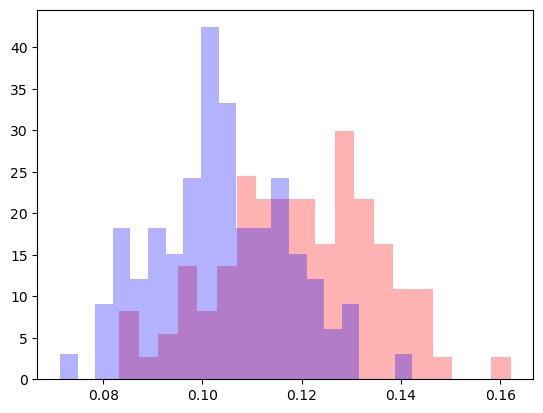

In [46]:
# построим распределения средних значений по дням в тесте и в контроле
# на что похоже это распределение?

plt.hist(test_conv_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_conv_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

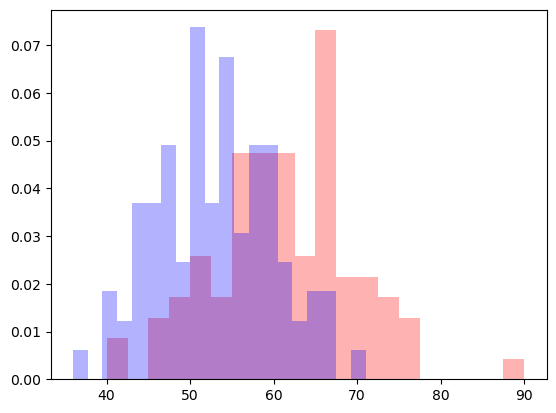

In [48]:
plt.hist(test_n_by_date['converted'], 20, density=True,color='r',alpha=0.3 )
plt.hist(control_n_by_date['converted'], 20, density=True,color='b',alpha=0.3 )

plt.show()

In [49]:
# теперь используем знание о том, что средние конверсии распределены нормально
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import ttest_ind

ttest_ind(test_conv_by_date, control_conv_by_date) # используйте документацию, test_conv_by_date, control_conv_by_date, чтобы провести тест


TtestResult(statistic=7.209029622736518, pvalue=1.4124701519287306e-11, df=184.0)

In [50]:
# используйте тот же статистический тест, чтобы оценить, отличаются ли  и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

ttest_ind(test_n_by_date['converted'], control_n_by_date['converted']) # используйте документацию, test_n_by_date, control_n_by_date, чтобы провести тест

TtestResult(statistic=7.048113433738303, pvalue=3.529180601649641e-11, df=184.0)